In [37]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv
import json

In [38]:
#load environment variables from a .env file
load_dotenv()

#initiate the language model
model = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
#model = ChatOpenAI(model_name="gpt-4", temperature=0)

In [39]:
#define the state graph
class BlogState(TypedDict):
    title: str
    outline: str
    blog: str

In [40]:
#define outline method
def create_outline(state: BlogState) -> BlogState:
    
    #fetch title
    title = state['title']

    #outline prompt
    outline_prompt = f"create the detailed outline for a blog on topic {title}"

    #call the model to create an outline
    outline = model.invoke(outline_prompt).content

    #update state with outline
    state['outline'] = outline

    return state
    

In [41]:
#define outline method
def create_blog(state: BlogState) -> BlogState:
    
    #fetch title, outline
    title = state['title']
    outline = state['outline']

    #blog prompt
    blog_prompt = f"create a blog on topic {title} with the following outline: {outline}"

    #call the model to create a blog
    blog = model.invoke(blog_prompt).content

    #update state with outline
    state['blog'] = blog

    return state
    

In [42]:
#define the state graph
graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()


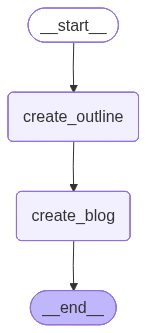

In [43]:
#workflow chart
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [44]:

#invoke the workflow of a blog creation
final_output = workflow.invoke({
    'title': "The innovation of AI in Bangladesh"
})

# Pretty print to terminal
print(json.dumps(final_output, indent=4, ensure_ascii=False))

{
    "title": "The innovation of AI in Bangladesh",
    "outline": "I. Introduction\n    A. Brief overview of AI technology\n    B. Importance of AI in various industries\n    C. Introduction to the innovation of AI in Bangladesh\n\nII. History of AI in Bangladesh\n    A. Early adoption of AI technology in Bangladesh\n    B. Growth and development of AI in the country\n    C. Major milestones in the innovation of AI in Bangladesh\n\nIII. Current state of AI in Bangladesh\n    A. Overview of AI startups and companies in Bangladesh\n    B. Adoption of AI in different sectors such as healthcare, finance, agriculture, etc.\n    C. Government initiatives to promote AI innovation in the country\n\nIV. Impact of AI innovation in Bangladesh\n    A. Economic benefits of AI technology\n    B. Social implications of AI in Bangladesh\n    C. Challenges and opportunities for AI innovation in the country\n\nV. Case studies of successful AI projects in Bangladesh\n    A. AI applications in healthcar